In [63]:
#Import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from fancyimpute import KNN 
import os
from sklearn.metrics import r2_score
from scipy import stats
%matplotlib inline

In [64]:
#Set working directory
os.chdir("F:/Data Science/Edwisor Workspace/Project/Employee Absentism")

In [65]:
#Load data
absent_data = pd.read_excel("Absenteeism_at_work_Project.xls")

Exploratory Data Analysis

In [66]:
#Check top 5 rows of data
absent_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [67]:
#Data Type of all the variables
absent_data.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [68]:
#Check Number of Unique values in each variable
absent_data.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [69]:
#Check dimension of data
absent_data.shape

(740, 21)

In [70]:
# Separating Continuous and Categorical Variables
continuous_vars = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

categorical_vars = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

Missing Value Analysis

In [71]:
#Create dataframe with missing values present in each variable
missing_val = pd.DataFrame(absent_data.isnull().sum())

In [72]:
#View missing values
missing_val

,0
ID,0
Reason for absence,3
Month of absence,1
Day of the week,0
Seasons,0
Transportation expense,7
Distance from Residence to Work,3
Service time,3
Age,3
Work load Average/day,10


In [73]:
#Reset Index
missing_val = missing_val.reset_index()

In [74]:
#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

In [75]:
#Calculate missing value percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(absent_data))*100

In [76]:
#Sort missing values in descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

In [77]:
missing_val

,Variables,Missing_percentage
0,Body mass index,4.189189
1,Absenteeism time in hours,2.972973
2,Height,1.891892
3,Work load Average/day,1.351351
4,Education,1.351351
5,Transportation expense,0.945946
6,Son,0.810811
7,Disciplinary failure,0.810811
8,Hit target,0.810811
9,Social smoker,0.540541


In [78]:
# Save output result as csv file
missing_val.to_csv("Missing_percentage_Python.csv", index = False)

Imputing Missing Values

In [79]:
# Droping observation in which "Absenteeism time in hours" has missing value
absent_data = absent_data.drop(absent_data[absent_data['Absenteeism time in hours'].isnull()].index, axis=0)

In [80]:
# Checking for "Body mass index" column
# Actual value = 24
# Mean = 26.68
# Median = 25
# KNN = 24

In [81]:
#Check data
absent_data['Body mass index'].iloc[95]

23.0

In [82]:
#create missing value
#absent_data['Body mass index'].iloc[95] = np.nan

In [83]:
#Impute with mean
#absent_data['Body mass index'] = absent_data['Body mass index'].fillna(absent_data['Body mass index'].mean())
#absent_data['Body mass index'].iloc[95]

In [84]:
#create missing value
#absent_data['Body mass index'].iloc[95] = np.nan

In [85]:
#Impute with median
#absent_data['Body mass index'] = absent_data['Body mass index'].fillna(absent_data['Body mass index'].median())
#absent_data['Body mass index'].iloc[95]

In [86]:
#create missing value
absent_data['Body mass index'].iloc[95] = np.nan

C:\Users\Abhinav Singh\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [87]:
#Apply KNN imputation algorithm
absent_data = pd.DataFrame(KNN(k = 3).fit_transform(absent_data), columns = absent_data.columns)

Imputing row 1/718 with 0 missing, elapsed time: 0.250
Imputing row 101/718 with 1 missing, elapsed time: 0.254
Imputing row 201/718 with 0 missing, elapsed time: 0.259
Imputing row 301/718 with 0 missing, elapsed time: 0.259
Imputing row 401/718 with 0 missing, elapsed time: 0.259
Imputing row 501/718 with 1 missing, elapsed time: 0.259
Imputing row 601/718 with 0 missing, elapsed time: 0.259
Imputing row 701/718 with 0 missing, elapsed time: 0.259


In [88]:
absent_data['Body mass index'].iloc[95]

23.046839112213974

In [89]:
#Check if all the missing values are imputed
absent_data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

OutLier Analysis

Text(0, 0.5, 'Values')

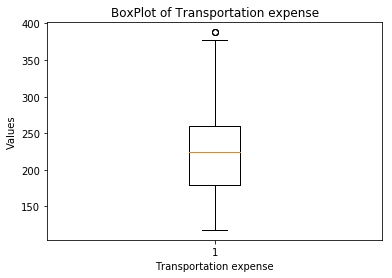

In [90]:
# Ploting BoxPlot of continuous variable Transportation expense
plt.boxplot(absent_data['Transportation expense'])
plt.xlabel("Transportation expense")
plt.title("BoxPlot of Transportation expense")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

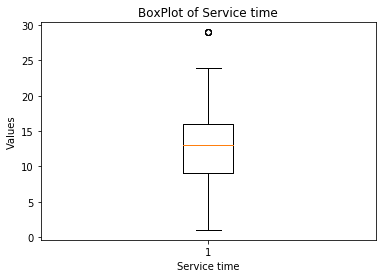

In [91]:
# Ploting BoxPlot of continuous variable Service time
plt.boxplot(absent_data['Service time'])
plt.xlabel("Service time")
plt.title("BoxPlot of Service time")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

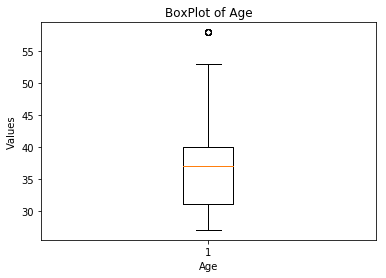

In [92]:
# Ploting BoxPlot of continuous variable Age
plt.boxplot(absent_data['Age'])
plt.xlabel("Age")
plt.title("BoxPlot of Age")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

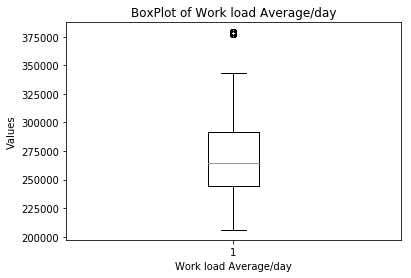

In [93]:
# Ploting BoxPlot of continuous variable Work load Average/day
plt.boxplot(absent_data['Work load Average/day '])
plt.xlabel("Work load Average/day")
plt.title("BoxPlot of Work load Average/day")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

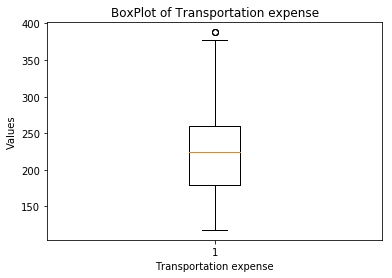

In [94]:
# Ploting BoxPlot of continuous variable Transportation expense
plt.boxplot(absent_data['Transportation expense'])
plt.xlabel("Transportation expense")
plt.title("BoxPlot of Transportation expense")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

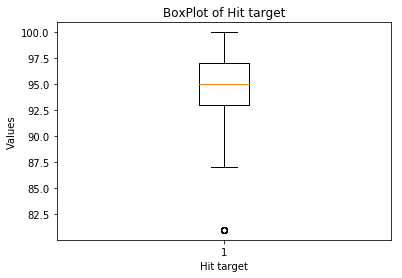

In [95]:
# Ploting BoxPlot of continuous variable Transportation expense
plt.boxplot(absent_data['Hit target'])
plt.xlabel("Hit target")
plt.title("BoxPlot of Hit target")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

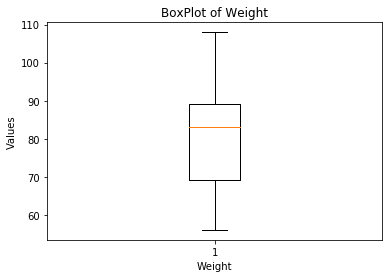

In [96]:
# Ploting BoxPlot of continuous variable Weight
plt.boxplot(absent_data['Weight'])
plt.xlabel("Weight")
plt.title("BoxPlot of Weight")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

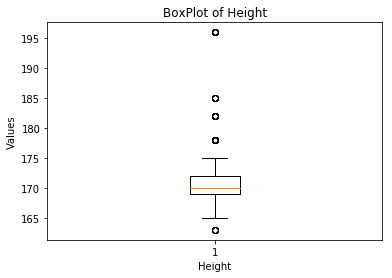

In [97]:
# Ploting BoxPlot of continuous variable Height
plt.boxplot(absent_data['Height'])
plt.xlabel("Height")
plt.title("BoxPlot of Height")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

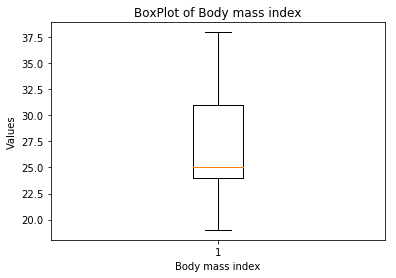

In [98]:
# Ploting BoxPlot of continuous variable Body mass index
plt.boxplot(absent_data['Body mass index'])
plt.xlabel("Body mass index")
plt.title("BoxPlot of Body mass index")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

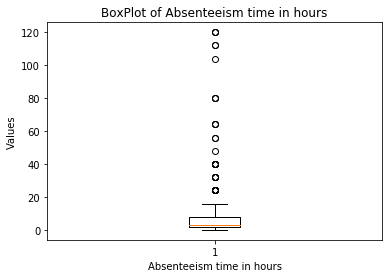

In [99]:
# Ploting BoxPlot of continuous variable Absenteeism time in hours
plt.boxplot(absent_data['Absenteeism time in hours'])
plt.xlabel("Absenteeism time in hours")
plt.title("BoxPlot of Absenteeism time in hours")
plt.ylabel('Values')

The above boxplots show that in variables 'Distance from Residence to Work', 'Weight' and 'Body mass index'
there are no outliers

In [100]:
#Storing variables with no outlier 
no_outliers = ['Distance from Residence to Work', 'Weight', 'Body mass index']

In [101]:
#Loop to detect and remove outliers
for i in continuous_vars:
    if i in no_outliers:
        continue
    # Getting 75 and 25 percentile 
    q75, q25 = np.percentile(absent_data[i], [75,25])
    #Calculating Interquartile range
    iqr = q75 - q25
    # Calculating upper and lower fence
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    #Replacing all the outliers value with NA
    absent_data.loc[absent_data[i]< min,i] = np.nan
    absent_data.loc[absent_data[i]> max,i] = np.nan

# Impute missing values created with KNN
absent_data = pd.DataFrame(KNN(k = 3).fit_transform(absent_data), columns = absent_data.columns)


Imputing row 1/718 with 0 missing, elapsed time: 0.206
Imputing row 101/718 with 0 missing, elapsed time: 0.206
Imputing row 201/718 with 1 missing, elapsed time: 0.219
Imputing row 301/718 with 0 missing, elapsed time: 0.222
Imputing row 401/718 with 0 missing, elapsed time: 0.224
Imputing row 501/718 with 0 missing, elapsed time: 0.225
Imputing row 601/718 with 2 missing, elapsed time: 0.227
Imputing row 701/718 with 0 missing, elapsed time: 0.235


In [102]:
# Check for missing values
absent_data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

Feature Selection

[]

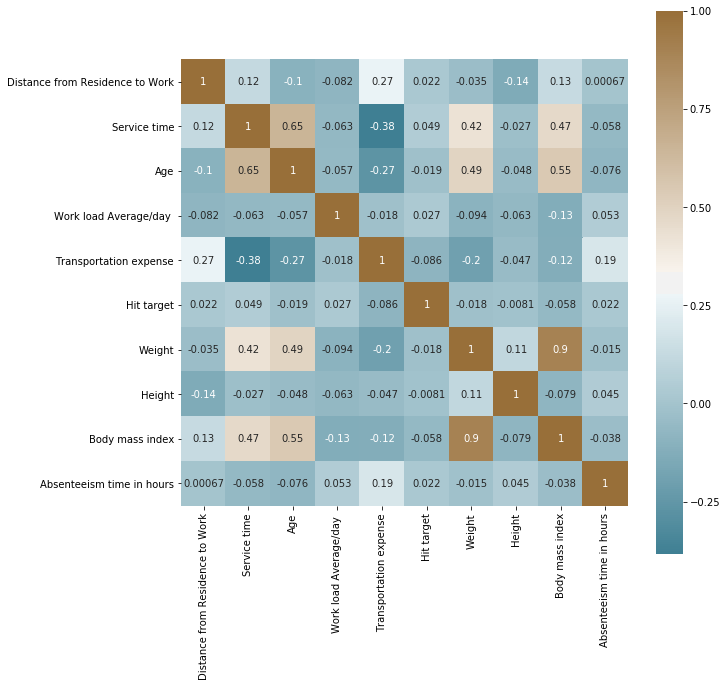

In [103]:
#Correlation plot for continuous variables
absent_data_corr = absent_data.loc[:,continuous_vars]

#Set width and height of the plot
f, ax = plt.subplots(figsize=(10, 10))

#correlation matrix
corr = absent_data_corr.corr()

#Plot heatmap
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [104]:
#ANOVA test for categorical variables
for i in categorical_vars:
    f, p = stats.f_oneway(absent_data[i], absent_data["Absenteeism time in hours"])
    print("P value for "+str(i)+" is "+str(p))

P value for ID is 8.449881295013552e-167
P value for Reason for absence is 9.770767089088417e-277
P value for Month of absence is 3.3124782278857673e-25
P value for Day of the week is 0.0008188161594849071
P value for Seasons is 3.127506937786291e-40
P value for Disciplinary failure is 1.2189432024253421e-185
P value for Education is 8.375003324993953e-105
P value for Social drinker is 1.2794395762714786e-150
P value for Social smoker is 9.117849965003895e-184
P value for Pet is 5.325984030592952e-127
P value for Son is 9.45269711512623e-116


In [105]:
# Droping the variables which has redundant information
absent_data = absent_data.drop(['Weight'], axis = 1)

In [106]:
absent_data.shape

(718, 20)

In [107]:
# Updating the Continuous Variables and Categorical Variables after droping some variables
drop = ['Weight']
continuous_vars = [i for i in continuous_vars if i not in drop]

In [108]:
#Keeping a back up data
backup_data = absent_data.copy()

Feature Scaling

C:\Users\Abhinav Singh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


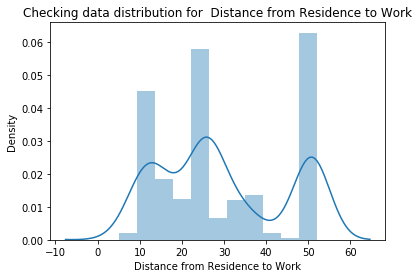

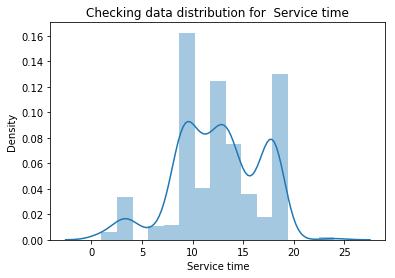

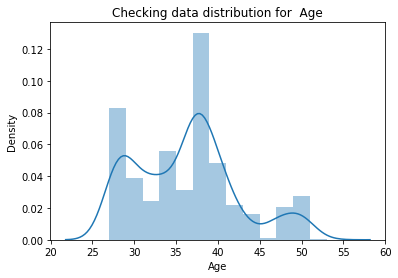

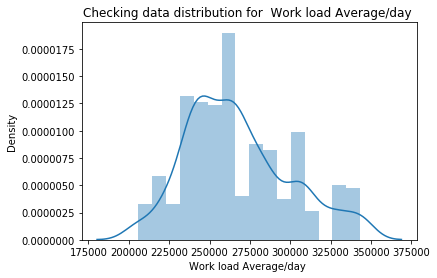

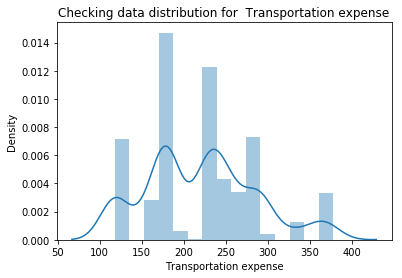

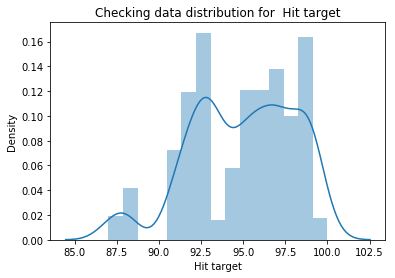

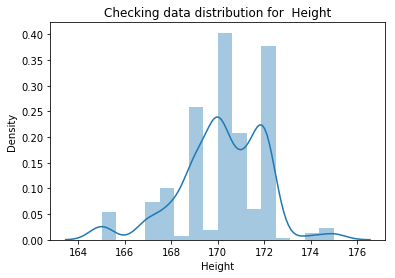

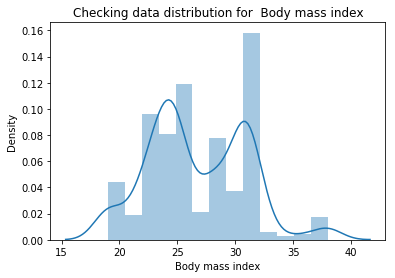

In [109]:
#Checking for normally distributed variable in data
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(absent_data[i],bins = 'auto')
    plt.title("Checking data distribution for  "+str(i))
    plt.ylabel("Density")
    plt.show()

In [110]:
#Normalization
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    absent_data[i] = (absent_data[i] - absent_data[i].min())/(absent_data[i].max()-absent_data[i].min())

In [111]:
#Check data
absent_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absenteeism time in hours
0,11.0,26.0,7.0,3.0,1.0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.0,1.0,2.0,1.0,0.0,1.0,0.700000,0.578947,4.0
1,36.0,0.0,7.0,3.0,1.0,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,1.0,1.0,1.0,1.0,0.0,0.0,0.500001,0.631579,0.0
2,3.0,23.0,7.0,4.0,1.0,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0.0,1.0,0.0,1.0,0.0,0.0,0.500000,0.631579,2.0
3,7.0,7.0,7.0,5.0,1.0,0.619231,0.000000,0.565217,0.461538,0.244925,0.769231,0.0,1.0,2.0,1.0,1.0,0.0,0.300000,0.263158,4.0
4,11.0,23.0,7.0,5.0,1.0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.0,1.0,2.0,1.0,0.0,1.0,0.700000,0.578947,2.0


In [112]:
#Creating dummy data for categorical variables
absent_data = pd.get_dummies(data = absent_data, columns = categorical_vars)

In [113]:
#Take backup of data
absent_data_copy = absent_data.copy()

In [114]:
absent_data.shape

(718, 130)

In [115]:
absent_data_copy.shape

(718, 130)

In [116]:
#Divide data into train
#X denotes independent variables, y denotes dependent variable
# Use train_test_split sampling function 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( absent_data.iloc[:, absent_data.columns != 'Absenteeism time in hours'], absent_data.iloc[:, 8], test_size = 0.20)

Decision Tree

In [117]:
#Import Decision Tree libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#Build model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

#Calculate RMSE for training data to check model overfit
pred_train = fit_DT.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_DT.predict(X_test)
rmse_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_train))
print("Root Mean Squared Error For Test data = "+str(rmse_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 3.036467199492181
Root Mean Squared Error For Test data = 3.4708044186587976
R^2 Score(coefficient of determination) = 0.0798633037530242


Random Forest

In [118]:
#Import Random Forest libraries
from sklearn.ensemble import RandomForestRegressor

#Build model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

#Calculate RMSE for training data to model overfit
pred_train = fit_RF.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculate RMSE for test data to check accuracy
pred_test = fit_RF.predict(X_test)
rmse_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_train))
print("Root Mean Squared Error For Test data = "+str(rmse_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 1.0546369223121614
Root Mean Squared Error For Test data = 2.988324426234373
R^2 Score(coefficient of determination) = 0.3179007730374489


Linear Regression

In [119]:
# Importing Linear Regression libraries
from sklearn.linear_model import LinearRegression

# Build model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_LR.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_LR.predict(X_test)
rmse_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_train))
print("Root Mean Squared Error For Test data = "+str(rmse_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 2.2624103397032584
Root Mean Squared Error For Test data = 1163405188012.0723
R^2 Score(coefficient of determination) = -1.03384173506759e+23


Gradient Boosting

In [120]:
#Import GradientBoosting library
from sklearn.ensemble import GradientBoostingRegressor

#Build model on top of train dataset
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

# Calculate RMSE for training data to check model over fitting
pred_train = fit_GB.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_GB.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 1.9707270355349726
Root Mean Squared Error For Test data = 2.9554130876859612
R^2 Score(coefficient of determination) = 0.3328423775132038


Dimensionality Reduction using PCA

In [121]:
#Store target variable in absent_target
absent_target = absent_data['Absenteeism time in hours']

In [122]:
#Drop target variable
absent_data.drop(['Absenteeism time in hours'], inplace = True, axis=1)

In [123]:
#Check structure
absent_data.shape

(718, 129)

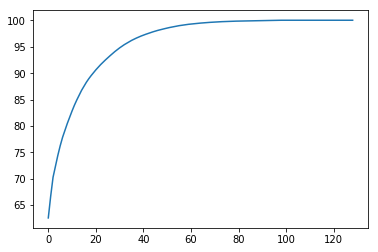

In [124]:
from sklearn.decomposition import PCA

#Convert data to numpy array
X = absent_data_copy.values

# Data has 129 variables so no of components of PCA = 129
pca = PCA(n_components=129)
pca.fit(X)

#The amount of variance each PCA explains
var= pca.explained_variance_ratio_

#Cumulative Variance
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
plt.show()

In [125]:
X.shape

(718, 130)

In [126]:
#From the above plot selecting 45 components as it explains < 95%  variance
pca = PCA(n_components=45)

# Fitting the selected components to the data
pca.fit(X)

# Using train_test_split sampling function for test and train data split
X_train, X_test, y_train, y_test = train_test_split(X,absent_target, test_size=0.2)

In [127]:
X_test.shape

(144, 130)

Decision Tree

In [128]:
#Import Decision Tree libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#Build model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

#Calculate RMSE for training data to check model overfit
pred_train = fit_DT.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_DT.predict(X_test)
rmse_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_train))
print("Root Mean Squared Error For Test data = "+str(rmse_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 0.5561008036507279
Root Mean Squared Error For Test data = 0.6326051515486173
R^2 Score(coefficient of determination) = 0.9615227595120752


Random forest

In [129]:
#Import Random Forest libraries
from sklearn.ensemble import RandomForestRegressor

#Build model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

#Calculate RMSE for training data to model overfit
pred_train = fit_RF.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculate RMSE for test data to check accuracy
pred_test = fit_RF.predict(X_test)
rmse_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_train))
print("Root Mean Squared Error For Test data = "+str(rmse_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 0.034202839110683995
Root Mean Squared Error For Test data = 0.062439694040330826
R^2 Score(coefficient of determination) = 0.9996251478536266


Linear Regression

In [130]:
# Importing Linear Regression libraries
from sklearn.linear_model import LinearRegression

# Build model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_LR.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_LR.predict(X_test)
rmse_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_train))
print("Root Mean Squared Error For Test data = "+str(rmse_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 2.3895881883051645e-15
Root Mean Squared Error For Test data = 0.00048688865586237563
R^2 Score(coefficient of determination) = 0.9999999772071947


Gradient Boosting

In [131]:
#Import GradientBoosting library
from sklearn.ensemble import GradientBoostingRegressor

#Build model on top of train dataset
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

# Calculate RMSE for training data to check model over fitting
pred_train = fit_GB.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_GB.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 0.0010897702558297381
Root Mean Squared Error For Test data = 0.04182356426715816
R^2 Score(coefficient of determination) = 0.9998318175975979


Visualisations

In [132]:
#import libraries
from ggplot import *

C:\Users\Abhinav Singh\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


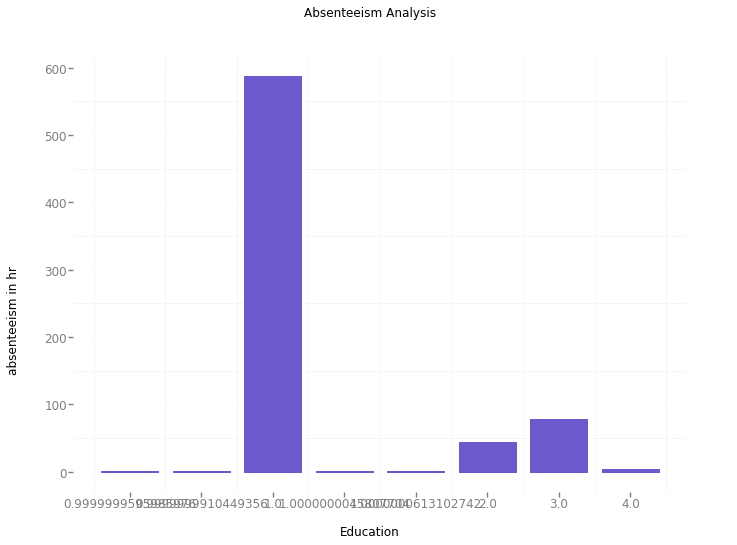

<ggplot: (-9223371854410983438)>

In [133]:
#Education
ggplot(backup_data, aes(x='Education', y='Absenteeism time in hours')) +\
    geom_bar(fill= "SlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Education") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

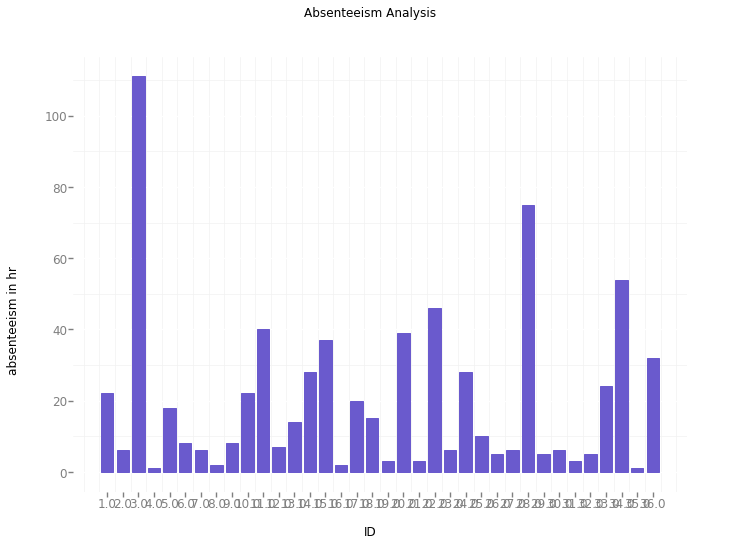

<ggplot: (-9223371854410983571)>

In [148]:
#ID
ggplot(backup_data, aes(x='ID', y='Absenteeism time in hours')) +\
    geom_bar(fill= "SlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("ID") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

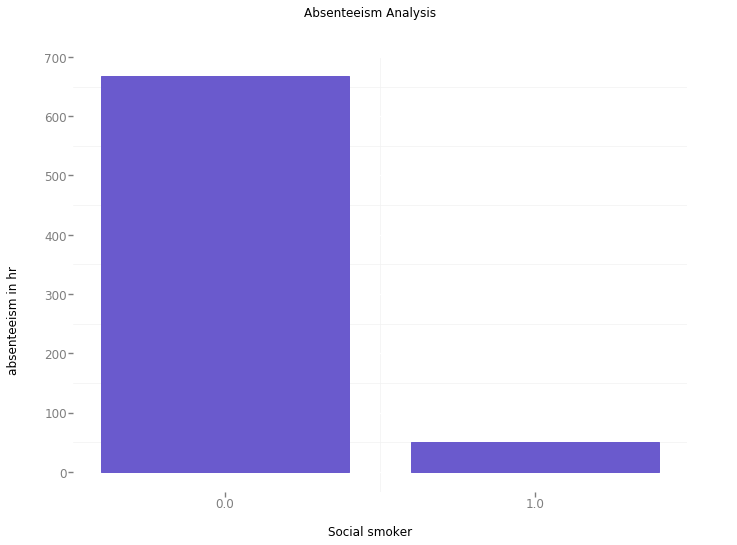

<ggplot: (182443792220)>

In [149]:
#Social smoker
ggplot(backup_data, aes(x='Social smoker', y='Absenteeism time in hours')) +\
    geom_bar(fill= "SlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Social smoker") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

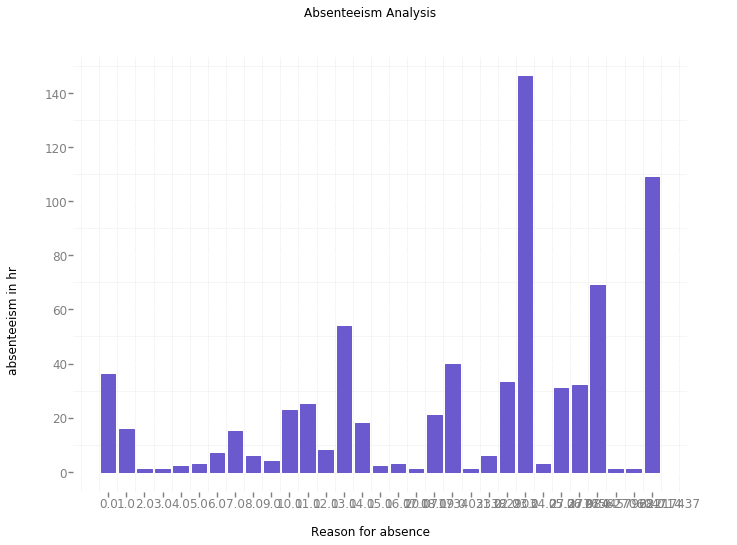

<ggplot: (-9223371854407317318)>

In [151]:
#Reason for absence
ggplot(backup_data, aes(x='Reason for absence', y='Absenteeism time in hours')) +\
    geom_bar(fill= "SlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Reason for absence") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

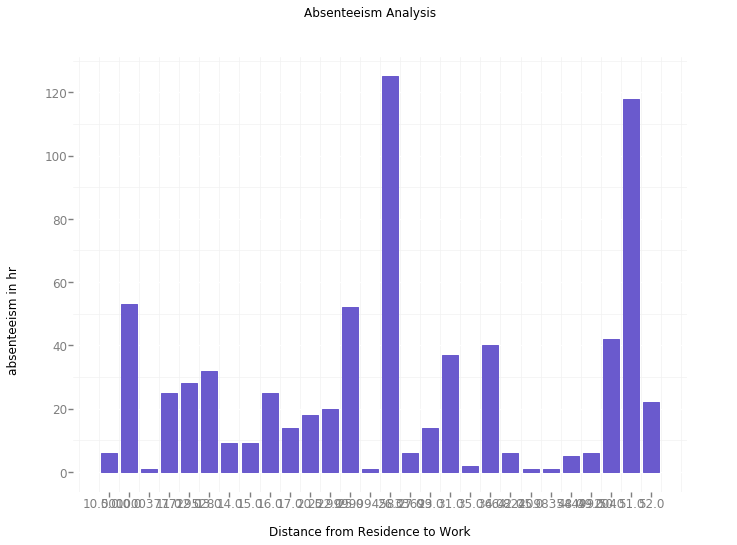

<ggplot: (182447803028)>

In [152]:
#Distance from Residence to Work
ggplot(backup_data, aes(x='Distance from Residence to Work', y='Absenteeism time in hours')) +\
    geom_bar(fill= "SlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Distance from Residence to Work") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

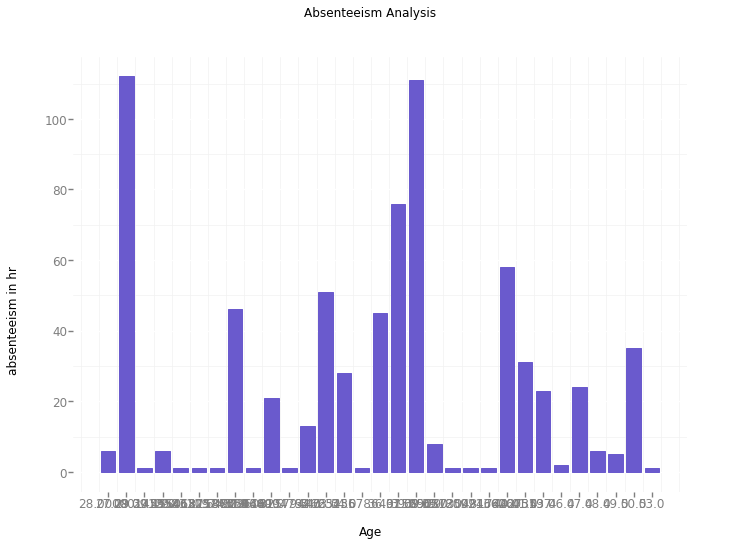

<ggplot: (182443795555)>

In [134]:
#Age
ggplot(backup_data, aes(x='Age', y='Absenteeism time in hours')) +\
    geom_bar(fill= "SlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Age") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

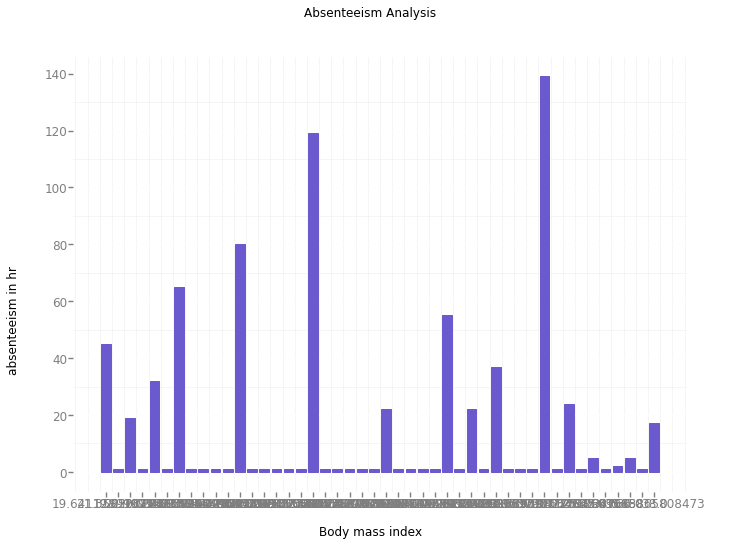

<ggplot: (182443857121)>

In [135]:
#Body mass index
ggplot(backup_data, aes(x='Body mass index', y='Absenteeism time in hours')) +\
    geom_bar(fill= "SlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Body mass index") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

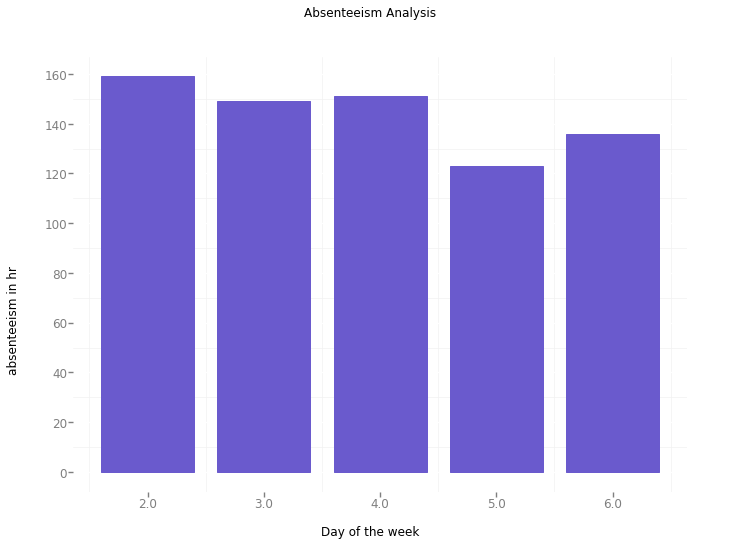

<ggplot: (-9223371854410676627)>

In [136]:
#Day of the week
ggplot(backup_data, aes(x='Day of the week', y='Absenteeism time in hours')) +\
    geom_bar(fill= "SlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Day of the week") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

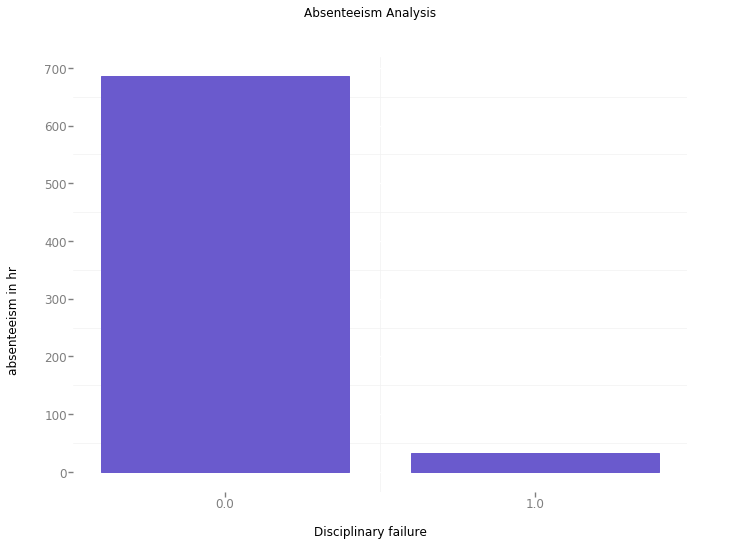

<ggplot: (-9223371854410599722)>

In [137]:
#Disciplinary failure
ggplot(backup_data, aes(x='Disciplinary failure', y='Absenteeism time in hours')) +\
    geom_bar(fill= "SlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Disciplinary failure") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

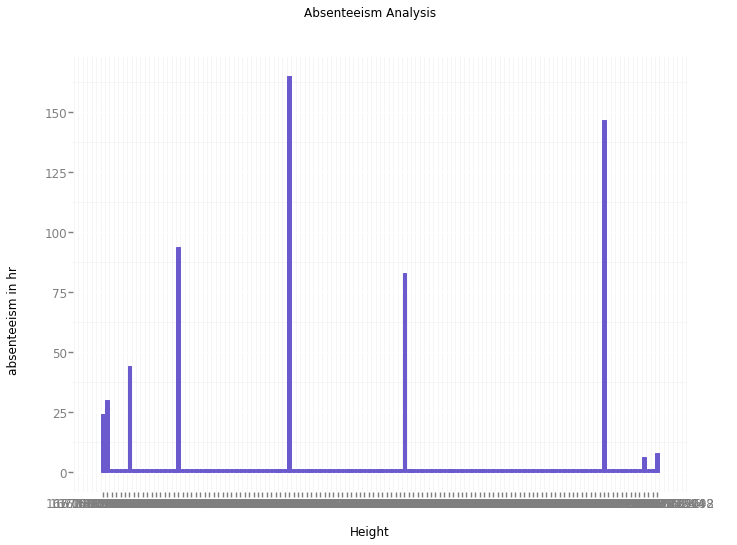

<ggplot: (182444327144)>

In [138]:
#Height
ggplot(backup_data, aes(x='Height', y='Absenteeism time in hours')) +\
    geom_bar(fill= "SlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Height") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

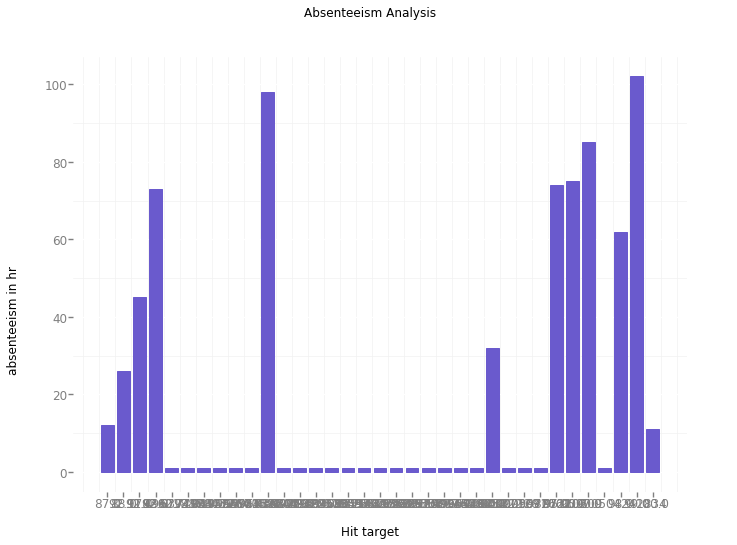

<ggplot: (182442508520)>

In [139]:
#Hit target
ggplot(backup_data, aes(x='Hit target', y='Absenteeism time in hours')) +\
    geom_bar(fill= "SlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Hit target") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

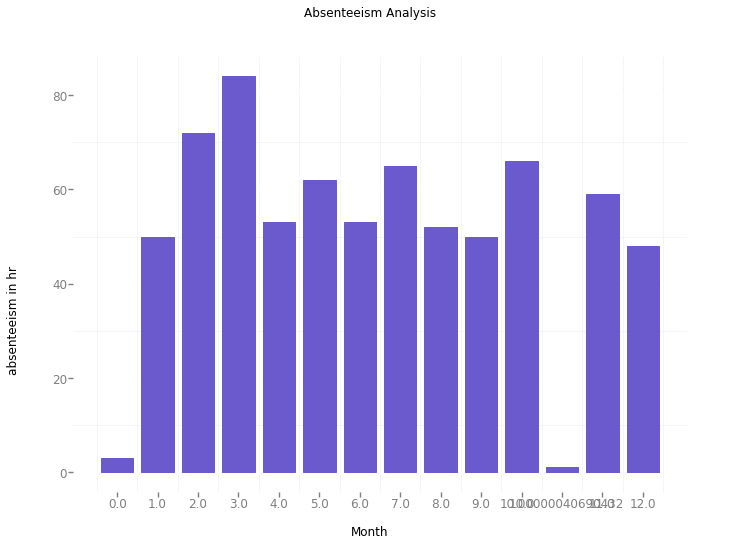

<ggplot: (182445629192)>

In [140]:
#Month of absence
ggplot(backup_data, aes(x='Month of absence', y='Absenteeism time in hours')) +\
    geom_bar(fill= "SlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Month") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

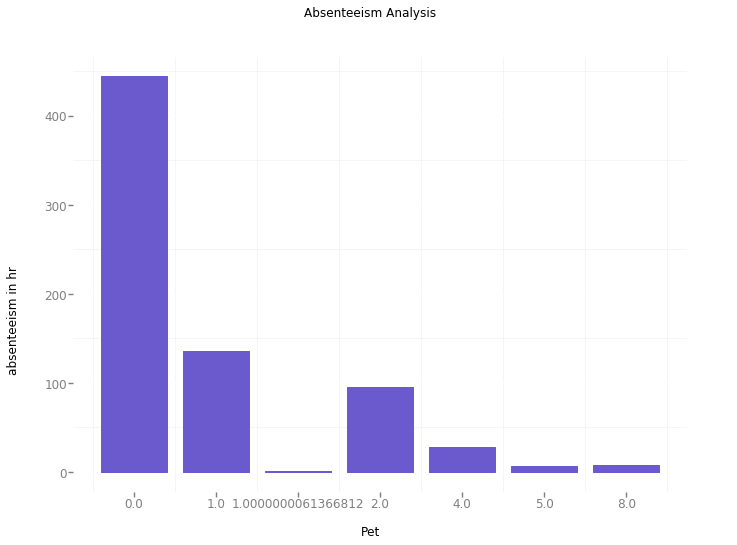

<ggplot: (182445660701)>

In [141]:
#Pet
ggplot(backup_data, aes(x='Pet', y='Absenteeism time in hours')) +\
    geom_bar(fill= "SlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Pet") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

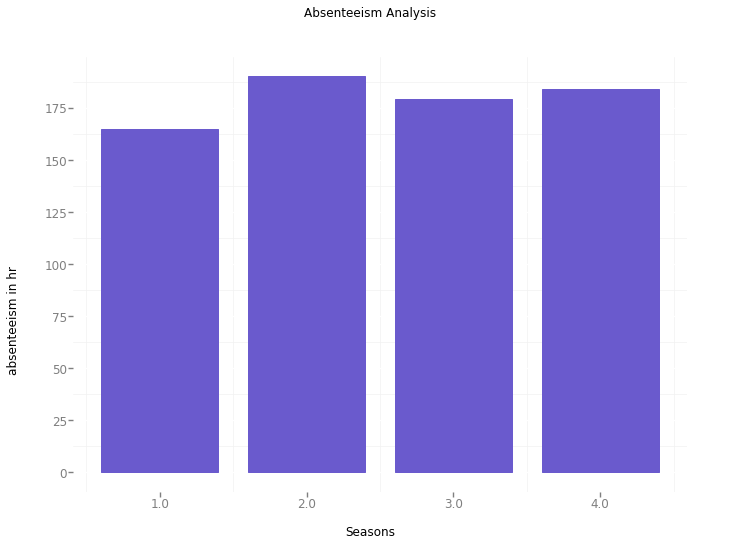

<ggplot: (182445841293)>

In [142]:
#Seasons
ggplot(backup_data, aes(x='Seasons', y='Absenteeism time in hours')) +\
    geom_bar(fill= "SlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Seasons") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

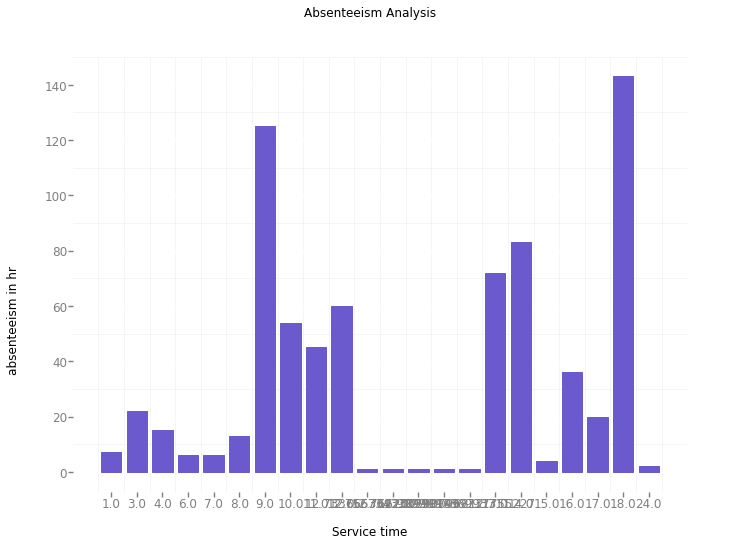

<ggplot: (182445855990)>

In [143]:
#Service time
ggplot(backup_data, aes(x='Service time', y='Absenteeism time in hours')) +\
    geom_bar(fill= "SlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Service time") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

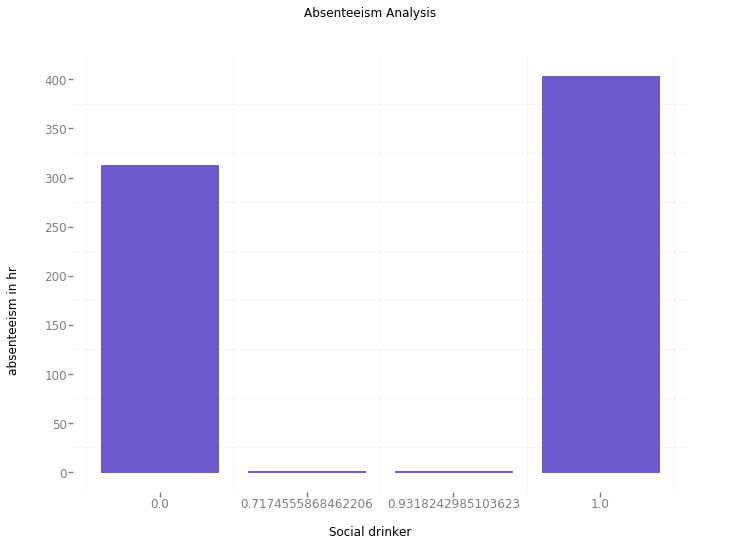

<ggplot: (182446524736)>

In [144]:
#Social drinker
ggplot(backup_data, aes(x='Social drinker', y='Absenteeism time in hours')) +\
    geom_bar(fill= "SlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Social drinker") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

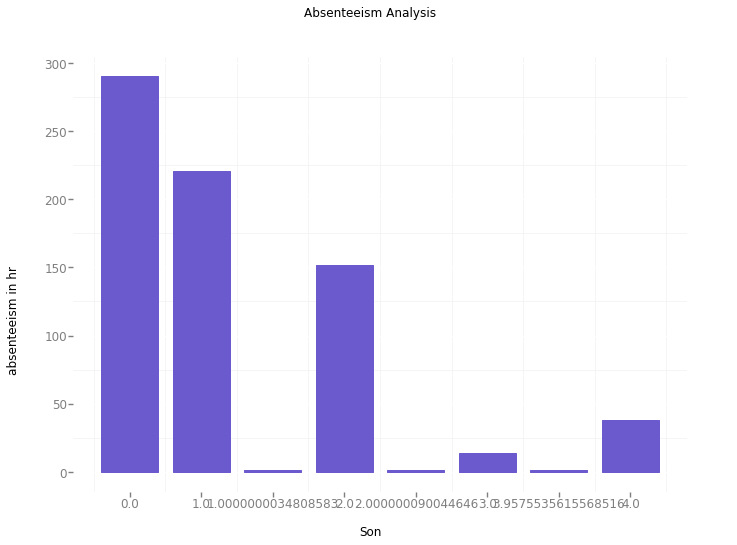

<ggplot: (-9223371854408259731)>

In [145]:
#Son
ggplot(backup_data, aes(x='Son', y='Absenteeism time in hours')) +\
    geom_bar(fill= "SlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Son") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

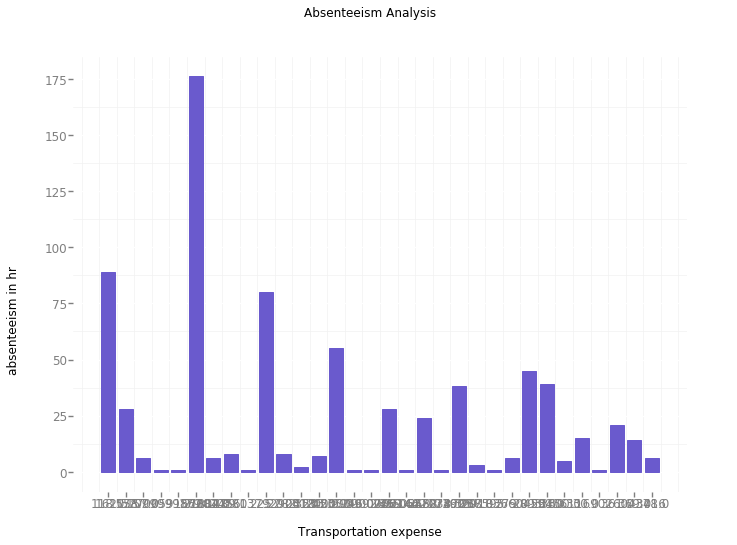

<ggplot: (182446231865)>

In [146]:
#Transportation expense
ggplot(backup_data, aes(x='Transportation expense', y='Absenteeism time in hours')) +\
    geom_bar(fill= "SlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Transportation expense") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

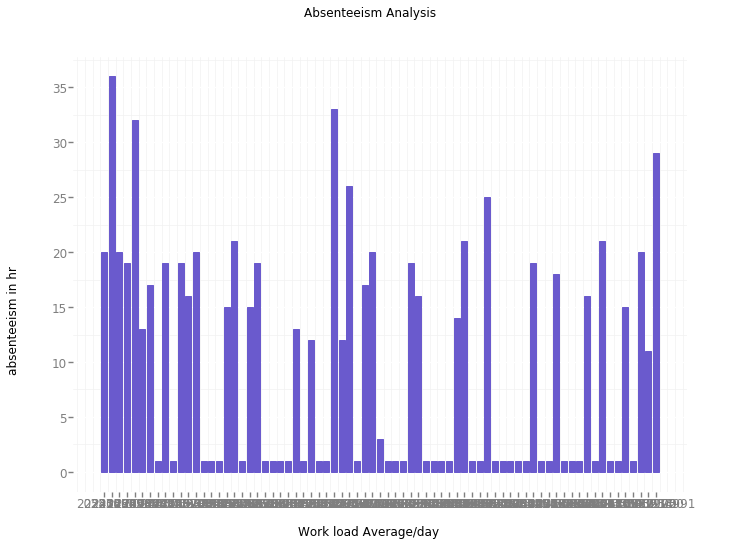

<ggplot: (-9223371854408104020)>

In [147]:
#Work load Average/day
ggplot(backup_data, aes(x='Work load Average/day ', y='Absenteeism time in hours')) +\
    geom_bar(fill= "SlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Work load Average/day ") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()